"\nplt.figure()\ncnt=0\nfor eps in eps_arr:\n    folder='./N_10000_tol_0.2_eps_'+str(eps)+'_U0_1_lam_8/mean-ideal_y_width.txt'\n    data=np.genfromtxt(folder)\n    plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt=colors[cnt]+'o-',capsize=5,label='eps='+str(eps)+'_y')##, color=colours.next())\n    \n    folder='./N_10000_tol_0.2_eps_'+str(eps)+'_U0_1_lam_8/mean-ideal_z_width.txt'\n    data=np.genfromtxt(folder)\n    plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt=colors[cnt]+'o--',capsize=5,label='eps='+str(eps)+'_z')\n    cnt=cnt+1\n\nplt.legend()\nplt.xlabel('perc of width=1-threshold')\nplt.ylabel('mean-ideal width')\nplt.axhline(y = 0, color = 'k',linewidth=3)\n\n"

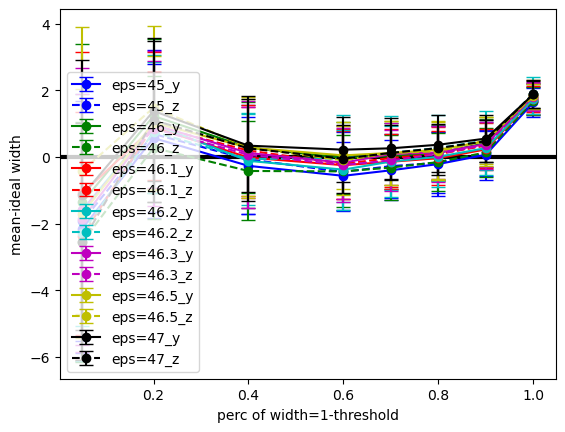

In [ ]:
####### Jupyter notebook file to plot the mean-ideal width (as calculated by mp_test_mean_density_during_tensile_consistent_density.py) 
# ##    as a function of epsilon, to find the optimum value of epsilon
## Devosmita Sen##
## August 2024 ##

import numpy as np
from matplotlib import pyplot as plt
from itertools import cycle
eps_arr=[45,46,46.1,46.2,46.3,46.5,47]##[35,40,45,46,46.1,47,49,50]##[45,46,46.1,47,48,49]##[35,40,45,46,46.1,47,48,49,50]##[45,46,46.1,46.5,47,48]#[35,40,45,46,46.5,47,48,50]
##colours = cycle(['red', 'green', 'blue','cyan','magenta'])

colors = ['b','g','r','c','m','y','k','hotpink','olive','tan','mediumorchid','orange']
run_arr=np.arange(1,51,dtype='int')
threshold_arr=np.array([0.0,0.1,0.2,0.3,0.4,0.6,0.8,0.95])

cnt=0

plt.figure()

for eps in eps_arr:
    
    ideal_y_arr=np.zeros((len(threshold_arr),2))
    ideal_z_arr=np.zeros((len(threshold_arr),2))
    
    mean_y_arr=np.zeros((len(threshold_arr),2))
    mean_z_arr=np.zeros((len(threshold_arr),2))
    thr_cnt=0
    for thresh in threshold_arr:
        ideal_width_y_arr=np.zeros(len(run_arr))
        mean_width_y_arr=np.zeros(len(run_arr))
        
        ideal_width_z_arr=np.zeros(len(run_arr))
        mean_width_z_arr=np.zeros(len(run_arr))
        
        run_cnt=0
        for run in run_arr:
            
          try:
            
            ideal_width_y=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/ideal_width_y_tensile_'+str(thresh)+'_test.txt')[0,1] ## initial width
            mean_width_y=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/width_y_tensile_'+str(thresh)+'_test.txt')[0,1]
            ideal_width_y_arr[run_cnt]=ideal_width_y
            mean_width_y_arr[run_cnt]=mean_width_y
            
            ideal_width_z=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/ideal_width_y_tensile_'+str(thresh)+'_test.txt')[0,1] ## initial width
            mean_width_z=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/width_z_tensile_'+str(thresh)+'_test.txt')[0,1]
            ideal_width_z_arr[run_cnt]=ideal_width_z
            mean_width_z_arr[run_cnt]=mean_width_z
            
            run_cnt=run_cnt+1
            
          except:
            ideal_width_y=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/ideal_width_y_tensile_'+str(thresh)+'_test.txt')[1] ## initial width
            mean_width_y=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/width_y_tensile_'+str(thresh)+'_test.txt')[1]
            ideal_width_y_arr[run_cnt]=ideal_width_y
            mean_width_y_arr[run_cnt]=mean_width_y
            
            ideal_width_z=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/ideal_width_y_tensile_'+str(thresh)+'_test.txt')[1] ## initial width
            mean_width_z=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/width_z_tensile_'+str(thresh)+'_test.txt')[1]
            ideal_width_z_arr[run_cnt]=ideal_width_z
            mean_width_z_arr[run_cnt]=mean_width_z
            
            run_cnt=run_cnt+1
            
        ideal_width_y_mean=np.mean(ideal_width_y_arr)
        ideal_width_y_std=np.std(ideal_width_y_arr)
        
        ideal_width_z_mean=np.mean(ideal_width_z_arr)
        ideal_width_z_std=np.std(ideal_width_z_arr)
        
        mean_width_y_mean=np.mean(mean_width_y_arr)
        mean_width_y_std=np.std(mean_width_y_arr)
        
        mean_width_z_mean=np.mean(mean_width_z_arr)
        mean_width_z_std=np.std(mean_width_z_arr)
        
        ideal_y_arr[thr_cnt,0]=ideal_width_y_mean
        ideal_y_arr[thr_cnt,1]=ideal_width_y_std
        
        ideal_z_arr[thr_cnt,0]=ideal_width_z_mean
        ideal_z_arr[thr_cnt,1]=ideal_width_z_std
        
        mean_y_arr[thr_cnt,0]=mean_width_y_mean
        mean_y_arr[thr_cnt,1]=mean_width_y_std
        
        mean_z_arr[thr_cnt,0]=mean_width_z_mean
        mean_z_arr[thr_cnt,1]=mean_width_z_std
        
        thr_cnt=thr_cnt+1
        
    diff_y=mean_y_arr-ideal_y_arr
    diff_z=mean_z_arr-ideal_z_arr
        
    plt.errorbar(1-threshold_arr,diff_y[:,0],yerr=diff_y[:,1],fmt='o-',color=colors[cnt],capsize=5,label='eps='+str(eps)+'_y')
    plt.errorbar(1-threshold_arr,diff_z[:,0],yerr=diff_z[:,1],fmt='o--',color=colors[cnt],capsize=5,label='eps='+str(eps)+'_z')
    
    ##plt.errorbar(1-threshold_arr,mean_y_arr[:,0],yerr=mean_y_arr[:,1],fmt=colors[cnt]+'o-',capsize=5,label='eps='+str(eps)+'_y')
    ##plt.errorbar(1-threshold_arr,mean_z_arr[:,0],yerr=mean_z_arr[:,1],fmt=colors[cnt]+'o-',capsize=5,label='eps='+str(eps)+'_z')
    np.savetxt('actual-ideal_width_vs_percwidth_eps='+str(eps)+'.txt',np.transpose(np.vstack((1-threshold_arr,diff_y[:,0],diff_y[:,1],diff_z[:,0],diff_z[:,1]))))
            
        
    cnt=cnt+1

plt.legend()
plt.xlabel('perc of width=1-threshold')
plt.ylabel('mean-ideal width')
plt.axhline(y = 0, color = 'k',linewidth=3)

'''
plt.figure()
cnt=0
for eps in eps_arr:
    folder='./N_10000_tol_0.2_eps_'+str(eps)+'_U0_1_lam_8/mean-ideal_y_width.txt'
    data=np.genfromtxt(folder)
    plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt=colors[cnt]+'o-',capsize=5,label='eps='+str(eps)+'_y')##, color=colours.next())
    
    folder='./N_10000_tol_0.2_eps_'+str(eps)+'_U0_1_lam_8/mean-ideal_z_width.txt'
    data=np.genfromtxt(folder)
    plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt=colors[cnt]+'o--',capsize=5,label='eps='+str(eps)+'_z')
    cnt=cnt+1

plt.legend()
plt.xlabel('perc of width=1-threshold')
plt.ylabel('mean-ideal width')
plt.axhline(y = 0, color = 'k',linewidth=3)

'''

In [2]:
np.savetxt('actual-ideal_width_vs_percwidth_eps='+str(eps)+'.txt',np.transpose(np.vstack((1-threshold_arr,diff_y[:,0],diff_y[:,1],diff_z[:,0],diff_z[:,1]))))

In [3]:
eps

47

In [4]:
np.vstack((diff_y,diff_z))[:,1]

array([0.3971459 , 0.69785637, 0.89853916, 0.92121067, 0.98302029,
       1.40468995, 2.10301676, 4.05068774, 0.4107776 , 0.62493112,
       0.71056844, 0.8250234 , 1.02061847, 1.58404802, 2.4637827 ,
       3.55351003])

Mean width over x, averaged over y and z: -0.26831986426857435
Error in mean width: 0.594566802734064
Mean width over x, averaged over y and z: -0.05494927558484322
Error in mean width: 0.5670451883039997
Mean width over x, averaged over y and z: 0.048301039728935014
Error in mean width: 0.5429160616639241
Mean width over x, averaged over y and z: 0.007459905637385272
Error in mean width: 0.6022406403952978
Mean width over x, averaged over y and z: 0.04777051913334416
Error in mean width: 0.5751200745060493
Mean width over x, averaged over y and z: 0.21399920356007296
Error in mean width: 0.5552612908233463


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean width over x, averaged over y and z: 0.27399191755573965
Error in mean width: 0.5527589319490239


"\nplt.figure()\ncnt=0\nfor eps in eps_arr:\n    folder='./N_10000_tol_0.2_eps_'+str(eps)+'_U0_1_lam_8/mean-ideal_y_width.txt'\n    data=np.genfromtxt(folder)\n    plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt=colors[cnt]+'o-',capsize=5,label='eps='+str(eps)+'_y')##, color=colours.next())\n    \n    folder='./N_10000_tol_0.2_eps_'+str(eps)+'_U0_1_lam_8/mean-ideal_z_width.txt'\n    data=np.genfromtxt(folder)\n    plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt=colors[cnt]+'o--',capsize=5,label='eps='+str(eps)+'_z')\n    cnt=cnt+1\n\nplt.legend()\nplt.xlabel('perc of width=1-threshold')\nplt.ylabel('mean-ideal width')\nplt.axhline(y = 0, color = 'k',linewidth=3)\n\n"

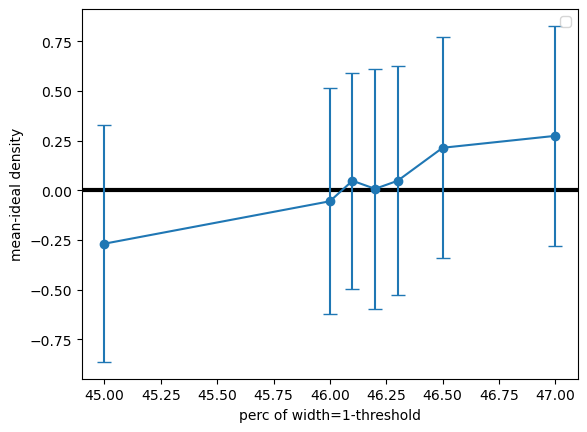

In [5]:
'''
import numpy as np
from matplotlib import pyplot as plt
from itertools import cycle
eps_arr=[35,40,45,50]
##colours = cycle(['red', 'green', 'blue','cyan','magenta'])

colors = ['b','g','r','c','m','y']
run_arr=np.arange(1,11,dtype='int')
'''
threshold_arr=np.array([0.4,0.6,0.8]) ##np.array([0.0,0.1,0.2,0.3,0.4,0.6,0.8,0.95])##

avg_diff_mean=np.zeros(len(eps_arr))
avg_diff_std=np.zeros(len(eps_arr))

cnt=0

plt.figure()

for eps in eps_arr:
    
    ideal_y_arr=np.zeros((len(threshold_arr),2))
    ideal_z_arr=np.zeros((len(threshold_arr),2))
    
    mean_y_arr=np.zeros((len(threshold_arr),2))
    mean_z_arr=np.zeros((len(threshold_arr),2))
    thr_cnt=0
    for thresh in threshold_arr:
        ideal_width_y_arr=np.zeros(len(run_arr))
        mean_width_y_arr=np.zeros(len(run_arr))
        
        ideal_width_z_arr=np.zeros(len(run_arr))
        mean_width_z_arr=np.zeros(len(run_arr))
        
        run_cnt=0
        for run in run_arr:
            
          try:
            
            ideal_width_y=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/ideal_width_y_tensile_'+str(thresh)+'_test.txt')[0,1] ## initial width
            mean_width_y=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/width_y_tensile_'+str(thresh)+'_test.txt')[0,1]
            ideal_width_y_arr[run_cnt]=ideal_width_y
            mean_width_y_arr[run_cnt]=mean_width_y
            
            ideal_width_z=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/ideal_width_y_tensile_'+str(thresh)+'_test.txt')[0,1] ## initial width
            mean_width_z=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/width_z_tensile_'+str(thresh)+'_test.txt')[0,1]
            ideal_width_z_arr[run_cnt]=ideal_width_z
            mean_width_z_arr[run_cnt]=mean_width_z
            
            run_cnt=run_cnt+1
            
          except:
            ideal_width_y=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/ideal_width_y_tensile_'+str(thresh)+'_test.txt')[1] ## initial width
            mean_width_y=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/width_y_tensile_'+str(thresh)+'_test.txt')[1]
            ideal_width_y_arr[run_cnt]=ideal_width_y
            mean_width_y_arr[run_cnt]=mean_width_y
            
            ideal_width_z=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/ideal_width_y_tensile_'+str(thresh)+'_test.txt')[1] ## initial width
            mean_width_z=np.genfromtxt('./tol_0.1_eps_'+str(eps)+'_4factor/Run'+str(run)+'/width_z_tensile_'+str(thresh)+'_test.txt')[1]
            ideal_width_z_arr[run_cnt]=ideal_width_z
            mean_width_z_arr[run_cnt]=mean_width_z
            
            run_cnt=run_cnt+1
            
        ideal_width_y_mean=np.mean(ideal_width_y_arr)
        ideal_width_y_std=np.std(ideal_width_y_arr)
        
        ideal_width_z_mean=np.mean(ideal_width_z_arr)
        ideal_width_z_std=np.std(ideal_width_z_arr)
        
        mean_width_y_mean=np.mean(mean_width_y_arr)
        mean_width_y_std=np.std(mean_width_y_arr)
        
        mean_width_z_mean=np.mean(mean_width_z_arr)
        mean_width_z_std=np.std(mean_width_z_arr)
        
        ideal_y_arr[thr_cnt,0]=ideal_width_y_mean
        ideal_y_arr[thr_cnt,1]=ideal_width_y_std
        
        ideal_z_arr[thr_cnt,0]=ideal_width_z_mean
        ideal_z_arr[thr_cnt,1]=ideal_width_z_std
        
        mean_y_arr[thr_cnt,0]=mean_width_y_mean
        mean_y_arr[thr_cnt,1]=mean_width_y_std
        
        mean_z_arr[thr_cnt,0]=mean_width_z_mean
        mean_z_arr[thr_cnt,1]=mean_width_z_std
        
        thr_cnt=thr_cnt+1
        
    diff_y=mean_y_arr-ideal_y_arr
    diff_z=mean_z_arr-ideal_z_arr
    
    ##import numpy as np

    # Assuming diff_y and diff_z are your arrays with shape (n, 2), where:
    # diff_y[:, 0] and diff_z[:, 0] are the widths in y and z directions, respectively
    # diff_y[:, 1] and diff_z[:, 1] are the errors in y and z directions, respectively

    # Extract widths and errors
    width_y, error_y = diff_y[:, 0], diff_y[:, 1]
    width_z, error_z = diff_z[:, 0], diff_z[:, 1]

    # Calculate the weighted mean for each direction (y and z) over x
    weights_y = 1 / (error_y ** 2)
    weights_z = 1 / (error_z ** 2)

    mean_width_y = np.sum(width_y * weights_y) / np.sum(weights_y)
    mean_width_z = np.sum(width_z * weights_z) / np.sum(weights_z)

    # Combined mean width over y and z
    combined_width = (mean_width_y + mean_width_z) / 2

    # Error propagation for the combined width
    # Assuming errors in y and z are independent
    error_combined = np.sqrt((1 / np.sum(weights_y)) + (1 / np.sum(weights_z))) / 2

    print(f"Mean width over x, averaged over y and z: {combined_width}")
    print(f"Error in mean width: {error_combined}")
    
    avg_diff_mean[cnt]=combined_width
    avg_diff_std[cnt]=error_combined



    cnt=cnt+1

plt.legend()
plt.xlabel('perc of width=1-threshold')
plt.ylabel('mean-ideal density')
plt.axhline(y = 0, color = 'k',linewidth=3)
plt.errorbar(eps_arr,avg_diff_mean,yerr=avg_diff_std,fmt='o-', capsize=5)

'''
plt.figure()
cnt=0
for eps in eps_arr:
    folder='./N_10000_tol_0.2_eps_'+str(eps)+'_U0_1_lam_8/mean-ideal_y_width.txt'
    data=np.genfromtxt(folder)
    plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt=colors[cnt]+'o-',capsize=5,label='eps='+str(eps)+'_y')##, color=colours.next())
    
    folder='./N_10000_tol_0.2_eps_'+str(eps)+'_U0_1_lam_8/mean-ideal_z_width.txt'
    data=np.genfromtxt(folder)
    plt.errorbar(data[:,0],data[:,1],yerr=data[:,2],fmt=colors[cnt]+'o--',capsize=5,label='eps='+str(eps)+'_z')
    cnt=cnt+1

plt.legend()
plt.xlabel('perc of width=1-threshold')
plt.ylabel('mean-ideal width')
plt.axhline(y = 0, color = 'k',linewidth=3)

'''

Slope (m): 0.285 ± 0.388
Intercept (c): -13.100 ± 17.924
x where y=0: 46.018 ± 88.886


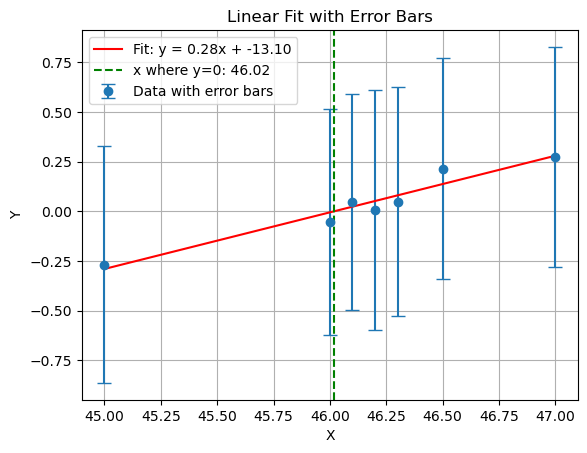

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the linear model
def linear_model(x, m, c):
    return m * x + c

# Example data
x_data = eps_arr##np.array([1, 2, 3, 4, 5])
y_data = avg_diff_mean##np.array([2.1, 4.0, 6.1, 7.8, 10.2])
y_err = avg_diff_std##np.array([0.2, 0.4, 0.3, 0.5, 0.4])  # Error in y-data

# Fit the data with error bars
popt, pcov = curve_fit(linear_model, x_data, y_data, sigma=y_err, absolute_sigma=True)

# Extract fit parameters and uncertainties
m_fit, c_fit = popt
m_err, c_err = np.sqrt(np.diag(pcov))

# Print the fit results
print(f"Slope (m): {m_fit:.3f} ± {m_err:.3f}")
print(f"Intercept (c): {c_fit:.3f} ± {c_err:.3f}")

# Calculate x where y = 0
if m_fit != 0:  # Avoid division by zero
    x_zero = -c_fit / m_fit
    x_zero_err = np.sqrt((c_err / m_fit) ** 2 + (c_fit * m_err / m_fit**2) ** 2)
    print(f"x where y=0: {x_zero:.3f} ± {x_zero_err:.3f}")
else:
    print("Slope is zero, no valid x where y=0.")

# Generate data for the fitted line
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = linear_model(x_fit, m_fit, c_fit)

# Plot the data with error bars and the fit
plt.errorbar(x_data, y_data, yerr=y_err, fmt='o', label='Data with error bars', capsize=5)
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y = {m_fit:.2f}x + {c_fit:.2f}')
plt.axvline(x_zero, color='g', linestyle='--', label=f'x where y=0: {x_zero:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Fit with Error Bars')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
np.savetxt('diff_vs_eps_for_opt.txt',np.transpose(np.vstack((x_data,y_data,y_err))))
np.savetxt('diff_vs_eps_for_opt_fit.txt',np.transpose(np.vstack((x_fit, y_fit))))

Slope (m): 0.283 ± 0.034
Intercept (c): -13.032 ± 1.550
x where y=0: 46.022 ± 7.730


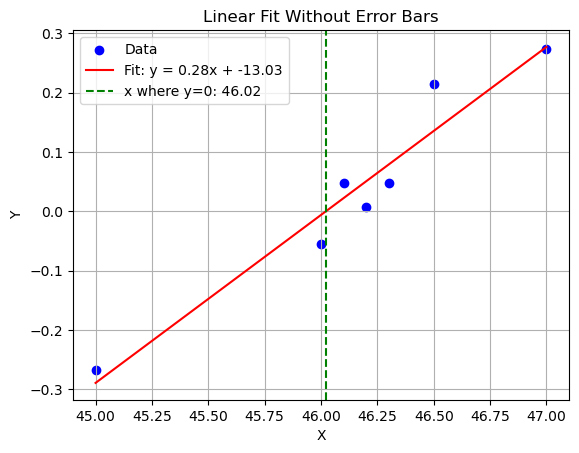

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the linear model
def linear_model(x, m, c):
    return m * x + c

# Example data
x_data = eps_arr##np.array([1, 2, 3, 4, 5])
y_data = avg_diff_mean##np.array([2.1, 4.0, 6.1, 7.8, 10.2])
y_err = avg_diff_std##np.array([0.2, 0.4, 0.3, 0.5, 0.4])  # Error in y-data


# Fit the data without error bars
popt, pcov = curve_fit(linear_model, x_data, y_data)

# Extract fit parameters and uncertainties
m_fit, c_fit = popt
m_err, c_err = np.sqrt(np.diag(pcov))

# Print the fit results
print(f"Slope (m): {m_fit:.3f} ± {m_err:.3f}")
print(f"Intercept (c): {c_fit:.3f} ± {c_err:.3f}")

# Calculate x where y = 0
if m_fit != 0:  # Avoid division by zero
    x_zero = -c_fit / m_fit
    x_zero_err = np.sqrt((c_err / m_fit) ** 2 + (c_fit * m_err / m_fit**2) ** 2)
    print(f"x where y=0: {x_zero:.3f} ± {x_zero_err:.3f}")
else:
    print("Slope is zero, no valid x where y=0.")

# Generate data for the fitted line
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = linear_model(x_fit, m_fit, c_fit)

# Plot the data and the fit
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y = {m_fit:.2f}x + {c_fit:.2f}')
plt.axvline(x_zero, color='g', linestyle='--', label=f'x where y=0: {x_zero:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Fit Without Error Bars')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
colors.next()